In [ ]:
import jeans 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import jeans 
import numpy as np

M200 = 1e12 # virial mass, Msun
R200 = 200 # virial radius, kpc
c = 10 # concentration, dimensionless
q0 = 0.8
rm = 10
GN = 4.302e-6 # gravitational constant in kpc (km/s)^2 Msun^-1

# Example baryonic potential: Miyamoto-Nagai disk
def Phi_b(r, th):
    Md = 6.4e10
    a = 3.5
    b = 0.53
    return -GN*Md/np.sqrt(r**2 * np.sin(th)**2 + (a + np.sqrt(b**2 + r**2 * np.cos(th)**2))**2)


profile = jeans.squashed(rm, M200, c, alpha=0.3, q0=q0, Phi_b=Phi_b)

if profile:
    print("Profile generated successfully")

compute_Phi_b_spherical (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.161 seconds.
relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/spherical.py) took 2.036 seconds.
compute_log_q_baryon (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.434 seconds.
compute_q_iso (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 1.693 seconds.
compute_q_eff (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 1.694 seconds.
compute_r_sph_grid (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 22.322 seconds.
Profile generated successfully


In [3]:
profile.outer.halo_type

'Einasto'

In [16]:
import datetime as dt 

now = dt.datetime.now()
print(now.strftime("%Y_%m_%d_%H_%M_%S"))

2025_09_24_14_48_54


In [18]:
check = 1.2

if check:
    print("Check is True")

Check is True


In [6]:
profile.outer.halo_type

'NFW'

In [4]:
filename = "example_profile.npz"
profile.save(filename)

In [6]:
new_profile = jeans.load(filename)

In [8]:
from jeans.classes import load_profile

In [9]:
new_profile = load_profile(filename)

In [7]:
new_profile.rho_sph_avg(10)

7084854.851888483

In [11]:
alpha = 0.17

profile = jeans.squashed(rm, M200, c, alpha, q0=q_sph, Phi_b=Phi_b)

if profile:
    print("Profile generated successfully")

Profile generated successfully


In [12]:
profile.outer.halo_type

'Einasto'

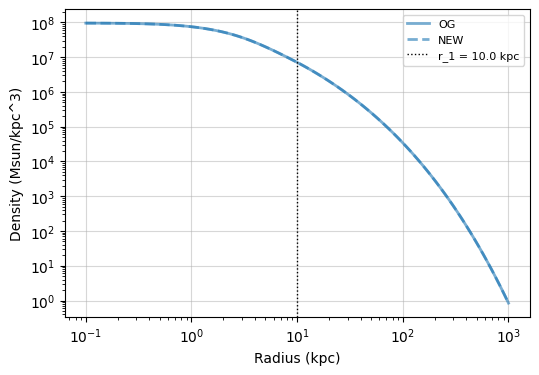

In [8]:

r = np.logspace(-1,3, num=100)

plt.figure(figsize=(6,4))
plt.loglog(r, profile.rho_sph_avg(r), label='OG', c='C0', alpha=0.6, ls='-', lw=2)
plt.loglog(r, new_profile.rho_sph_avg(r), label='NEW',  c='C1', alpha=0.6, ls='--', lw=2)
plt.axvline(profile.r1, color='k', ls=':', lw=1, label=f'r_1 = {profile.r1:.1f} kpc')
plt.xlabel('Radius (kpc)')
plt.ylabel('Density (Msun/kpc^3)')
plt.grid(True, which='major', alpha=0.5, axis='both')
plt.legend(fontsize=8)
plt.show()